## Example Contrail Grid Data Product

- Time: `2022-01-10 00:00:00` - `2022-01-10 11:00:00` (12 hours)
- Aircraft: *A320*
- Flight heading: *90*
- Flight speed: *set to nominal for flight level*

### Data Access

- Available in storage bucket [gs://contrail-grid-demo-data](https://console.cloud.google.com/storage/browser/contrails-301217-grid-sample-data)
- Download using [google-cloud-sdk](https://cloud.google.com/sdk/docs/quickstart) command line tools

```
# download netcdf files
$ gsutil -m cp -r gs://contrails-301217-grid-sample-data/netcdf netcdf

# download zarr files
$ gsutil -m cp -r gs://contrails-301217-grid-sample-data/zarr zarr

# download grib files
$ gsutil -m cp -r gs://contrails-301217-grid-sample-data/grib grib
```

This notebook requires [xarray](https://xarray.pydata.org/en/stable/index.html) to read NetCDF/Zarr files and [cfgrib](https://github.com/ecmwf/cfgrib) to read Grib files.

```
$ pip install xarray

# cfgrib requires binary dependencies, so its easiest to install with:
$ conda install -c conda-forge cfgrib

# or you can install the binary dependencies yourself:
$ brew install eccodes (mac)
$ sudo apt-get install eccodes (linux)
$ pip install cfgrib
```

### Load Data (NetCDF)

In [1]:
import xarray as xr
import numpy as np

In [2]:
# open single hour
filename = "netcdf/20220110.00.nc"
ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:       (longitude: 1440, latitude: 641, level: 4, time: 1)
Coordinates:
  * longitude     (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude      (latitude) float64 -80.0 -79.75 -79.5 ... 79.5 79.75 80.0
  * level         (level) float64 200.0 225.0 250.0 300.0
  * time          (time) datetime64[ns] 2022-01-10
    air_pressure  (level) float64 ...
    altitude      (level) float64 ...
Data variables:
    ef_per_m      (longitude, latitude, level, time) float64 ...
Attributes:
    description:    Contrail evolution results
    aircraft_type:  A320
    azimuth:        90

In [3]:
# open all hours
filenames = "netcdf/*.nc"
ds = xr.open_mfdataset(filenames)
ds

<xarray.Dataset>
Dimensions:       (longitude: 1440, latitude: 641, level: 4, time: 12)
Coordinates:
  * longitude     (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude      (latitude) float64 -80.0 -79.75 -79.5 ... 79.5 79.75 80.0
  * level         (level) float64 200.0 225.0 250.0 300.0
  * time          (time) datetime64[ns] 2022-01-10 ... 2022-01-10T11:00:00
    air_pressure  (level) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    altitude      (level) float64 dask.array<chunksize=(4,), meta=np.ndarray>
Data variables:
    ef_per_m      (longitude, latitude, level, time) float64 dask.array<chunksize=(1440, 641, 4, 1), meta=np.ndarray>
Attributes:
    description:    Contrail evolution results
    aircraft_type:  A320
    azimuth:        90

### Plot data

In [4]:
# open single hour
filename = "netcdf/20220110.01.nc"
ds = xr.open_dataset(filename)

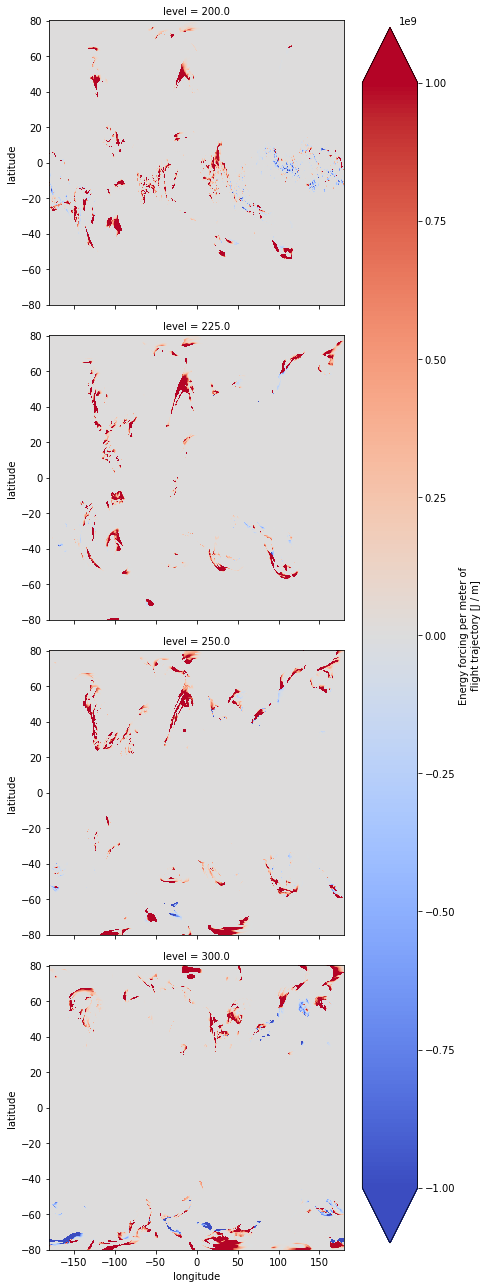

In [5]:
# select a single pressure level for "ef_per_m"
da = ds["ef_per_m"]

# plot
da.squeeze().plot(x="longitude", y="latitude", row="level", figsize=(6, 18), vmin=-1e9, vmax=1e9, cmap="coolwarm");

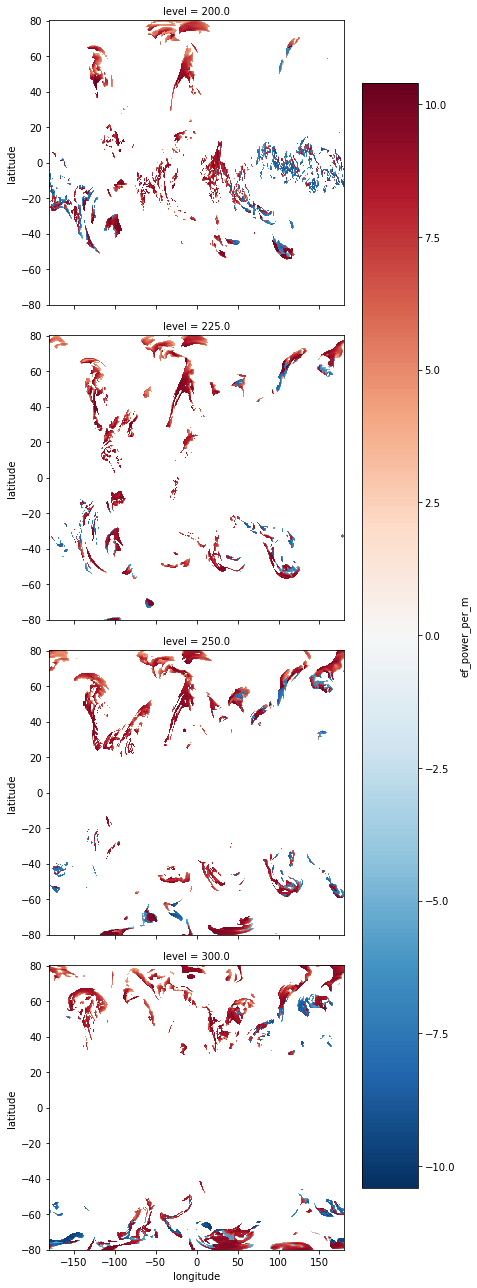

In [6]:
# show on log scale
ef = ds["ef_per_m"].where(ds["ef_per_m"] != 0)
log_ef = np.sign(ef) * np.log10(np.abs(ef))
log_ef.name = 'ef_power_per_m'

# plot
log_ef.squeeze().plot(x="longitude", y="latitude", row="level", figsize=(6, 18));

## Load Data (GRIB)

Note that the data format is slight different in the GRIB format to conform to GRIB standards:

- Pressure level dimensions is `isobaricInhPa` (instead of `level`)
- Data variable is `p80.128` (instead of `ef_per_m`). The data is still in units of `J / m`.

In [3]:
import xarray as xr
import numpy as np
import cfgrib

In [4]:
# open single hour
filename = "O:\Projects\Emission\ORCA\Data\GRIB\\20220110.00.grib2"
ds = xr.open_dataset(filename, engine="cfgrib")
ds

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 4, latitude: 641, longitude: 1440)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 300.0 250.0 225.0 200.0
  * latitude       (latitude) float64 -80.0 -79.75 -79.5 ... 79.5 79.75 80.0
  * longitude      (longitude) float64 -180.0 -179.8 -179.5 ... 179.5 179.8
    valid_time     datetime64[ns] ...
Data variables:
    p80.128        (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-03-08T13:32 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
# open all hours
filenames = "O:\Projects\Emission\ORCA\Data\GRIB\*.grib2"
ds = xr.open_mfdataset(filenames, combine="nested", concat_dim="time")
ds

Ignoring index file '/Users/marcus/computing/daitem/contrails/admin/notebooks/FLIGHTKEYS/grib/20220110.00.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/Users/marcus/computing/daitem/contrails/admin/notebooks/FLIGHTKEYS/grib/20220110.01.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/Users/marcus/computing/daitem/contrails/admin/notebooks/FLIGHTKEYS/grib/20220110.02.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/Users/marcus/computing/daitem/contrails/admin/notebooks/FLIGHTKEYS/grib/20220110.03.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/Users/marcus/computing/daitem/contrails/admin/notebooks/FLIGHTKEYS/grib/20220110.04.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/Users/marcus/computing/daitem/contrails/admin/notebooks/FLIGHTKEYS/grib/20220110.05.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/Users/marcus/computing/daitem/contrails/admin/notebooks/FLIGHTKEYS/grib/

<xarray.Dataset>
Dimensions:        (time: 12, isobaricInhPa: 4, latitude: 641, longitude: 1440)
Coordinates:
  * time           (time) datetime64[ns] 2022-01-10 ... 2022-01-10T11:00:00
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) float64 300.0 250.0 225.0 200.0
  * latitude       (latitude) float64 -80.0 -79.75 -79.5 ... 79.5 79.75 80.0
  * longitude      (longitude) float64 -180.0 -179.8 -179.5 ... 179.5 179.8
    valid_time     (time) datetime64[ns] 2022-01-10 ... 2022-01-10T11:00:00
Data variables:
    p80.128        (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(1, 4, 641, 1440), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-03-08T13:36 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
# plot single hour
filename = "O:\Projects\Emission\ORCA\Data\GRIB\\20220110.01.grib2"
ds = xr.open_dataset(filename)

Ignoring index file 'grib/20220110.01.grib2.923a8.idx' incompatible with GRIB file


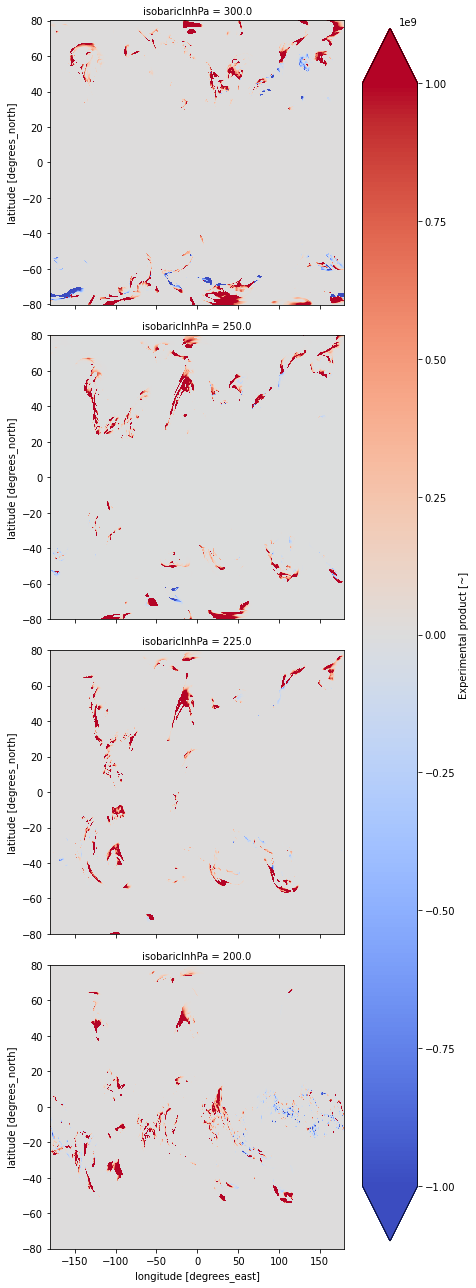

In [11]:
# select a single pressure level for "ef_per_m"
da = ds["p80.128"]

# plot
da.plot(x="longitude", y="latitude", row="isobaricInhPa", figsize=(6, 18), vmin=-1e9, vmax=1e9, cmap="coolwarm");